# Tutorial 1: Interpolation and Quadrature

### Problem 1

Interpolate the following function:
$$f(x) = \frac{1}{1+25 x^2}$$
for $x \in [-1, 1]$ by the following methods.

* (a) On an equidistant (uniform) grid for piecewise constant and piecewise linear interpolation. 
* (b) Polynomial interpolation on a uniform grid (i.e., equidistant points), with any method.
* (c) A Chebyshev grid (i.e., when the interpolation points are the roots of Chebyshev polynomials - google for the expression of the Chebyshev roots).

Calculate the interpolation error as the number of points increases (or the grid resolution $h$ decreases). How does the interpolation error depend on the grid resolution (what is the order of convergence)? Plot this dependense on a logarithmic scale and comment on the results.

In [2]:
import numpy as np
import numpy.linalg as lin
import scipy
import matplotlib.pyplot as plt

In [3]:
def f_true(x):
    return 1/(1 + 25*x**2)

def uniform_grid(n):
    return np.linspace(-1, 1, n)

x_dense_grid = uniform_grid(200)

In [4]:
def RMSE(f):
    return np.sqrt(np.sum(np.array([f(x)-f_true(x) for x in x_dense_grid])**2 / len(x_dense_grid)))

def plot_interpolation(f, label=""):
    y_dense_grid = [f(x) for x in x_dense_grid]
    plt.plot(x_dense_grid, y_dense_grid, label=label)

def plot_error(f, label=""):
    y_dense_grid = [f(x)-f_true(x) for x in x_dense_grid]  
    plt.plot(x_dense_grid, y_dense_grid, label=label)

# 1a. Piecewise interpolation

In [5]:
def f_pwc(x):
    x_nearest_ind = np.abs(x_grid - x).argmin()
    x_nearest = x_grid[x_nearest_ind]
    return f_true(x_nearest)

def f_pwlin(x):
    x_nearest_ind = np.abs(x_grid - x).argmin()
    x_nearest = x_grid[x_nearest_ind]

    if x_nearest == x:
        return f_true(x_nearest)
    elif x_nearest > x:
        x_nearest_left = x_grid[x_nearest_ind-1]
        x_nearest_right = x_grid[x_nearest_ind]
    else:
        x_nearest_left = x_grid[x_nearest_ind]
        x_nearest_right = x_grid[x_nearest_ind+1]
        
    weight = (x - x_nearest_left) / (x_nearest_right - x_nearest_left)   
    return f_true(x_nearest_left) + (f_true(x_nearest_right) - f_true(x_nearest_left)) * weight

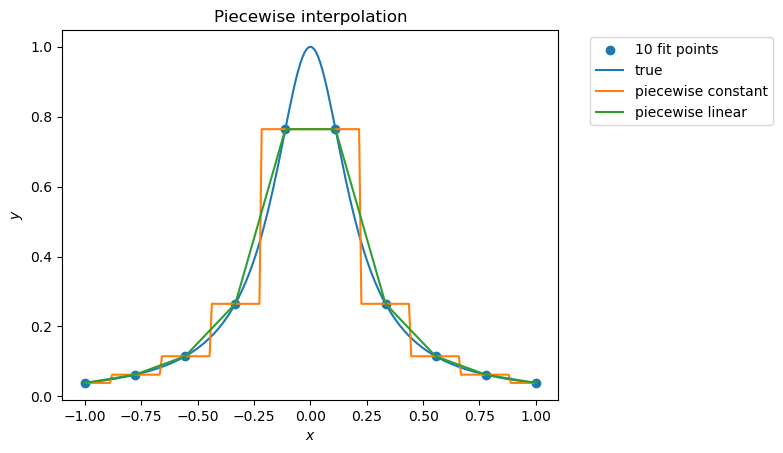

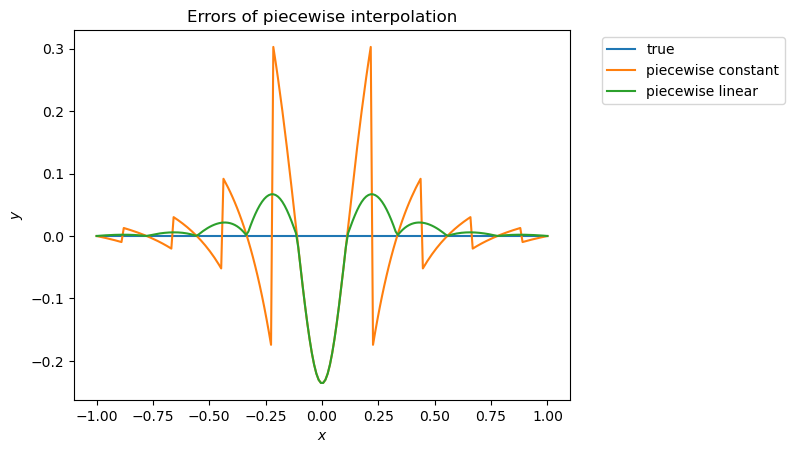

In [9]:
grid_points = 10
x_grid = uniform_grid(grid_points)
y_grid = [f_true(x) for x in x_grid]
plt.scatter(x_grid, y_grid, label=f"{grid_points} fit points")

plot_interpolation(f_true, label="true")
plot_interpolation(f_pwc, label="piecewise constant")
plot_interpolation(f_pwlin, label="piecewise linear")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Piecewise interpolation")
plt.show()

# Errors
plot_error(f_true, label=f"true")
plot_error(f_pwc, label=f"piecewise constant")
plot_error(f_pwlin, label=f"piecewise linear")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of piecewise interpolation")
plt.show()


## 1b. Polynomial interpolation on uniform grid

### Fixed number of points

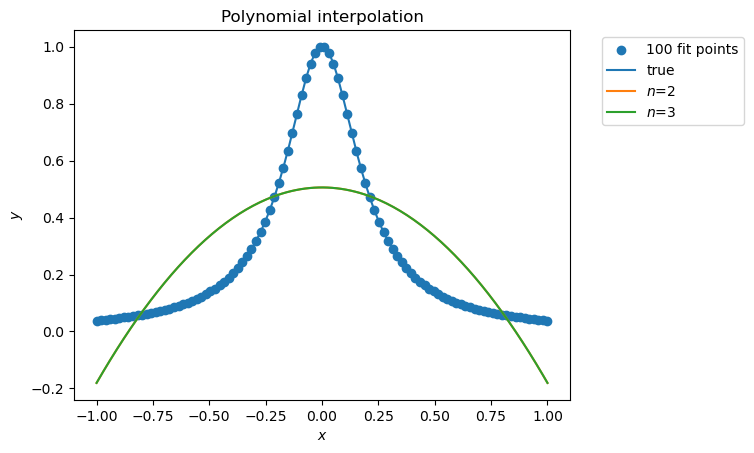

In [15]:
grid_points = 100
x_grid = uniform_grid(grid_points)
y_grid = [f_true(x) for x in x_grid]
plt.scatter(x_grid, y_grid, label=f"{grid_points} fit points")

plot_interpolation(f_true, label="true")

n_grid = range(2, 4)
for n in n_grid:
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_interpolation(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation")
plt.show()

#### Q: Why polynomials with N=2k and N=2k+1 are equal?

In [13]:
np.round(np.polyfit(x_grid, y_grid, 3), 4)

array([ 0.    , -0.5539, -0.    ,  0.4745])

### More polynomials

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


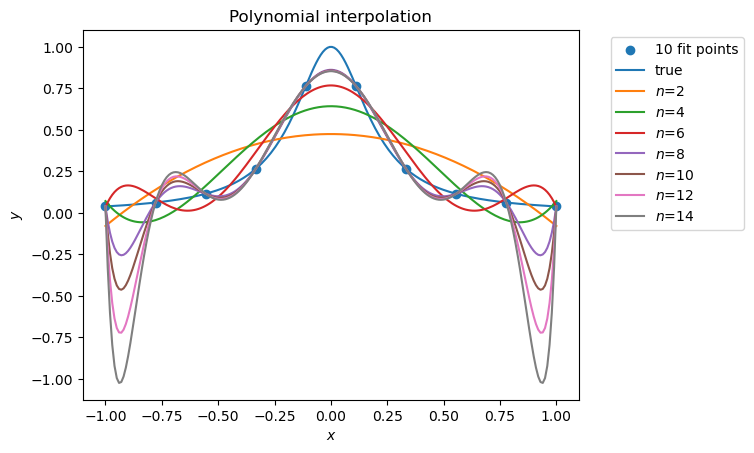

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


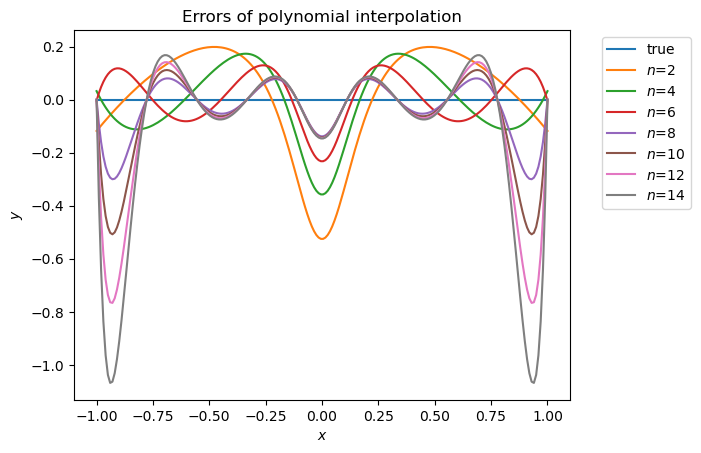

In [17]:
grid_points = 10
x_grid = uniform_grid(grid_points)
y_grid = [f_true(x) for x in x_grid]
plt.scatter(x_grid, y_grid, label=f"{grid_points} fit points")

plot_interpolation(f_true, label="true")

n_grid = range(2, 15, 2)

for n in n_grid:
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_interpolation(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation")
plt.show()


# Errors
plot_error(f_true, label=f"true")
for n in n_grid:
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_error(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of polynomial interpolation")
plt.show()


#### Q: Why Polyfit complains?

In [ ]:
# Calculate RMSE(y_predict - y_true) as dependency on polynomial power.

### Number of points + 1 == power of polynomial

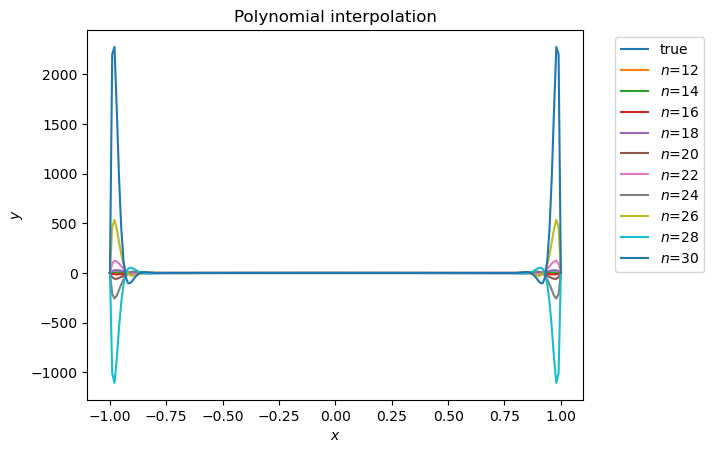

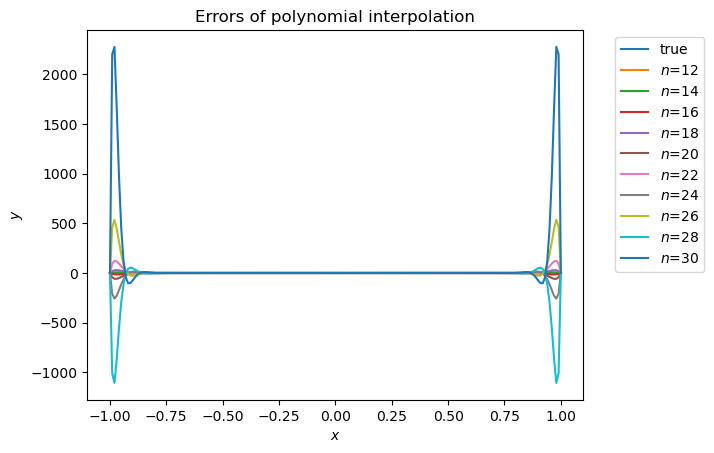

In [22]:
# investigate powers: 2-7, 8-11, 12-31
n_grid = range(12, 31, 2)


# Ground truth
plot_interpolation(f_true, label="true")

# Interpolations
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]

    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_interpolation(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation")
plt.show()


# Errors
plot_error(f_true, label=f"true")
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_error(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of polynomial interpolation")
plt.show()


#### Q: Why there are ossillations on the ends for large $n$?

## 1c. Polynomial interpolation on Chebyshev grid

In [23]:
def chebyshev_grid(n):
    k = np.arange(1, n+1)
    return np.cos((2*k-1)/(2*n) * np.pi)

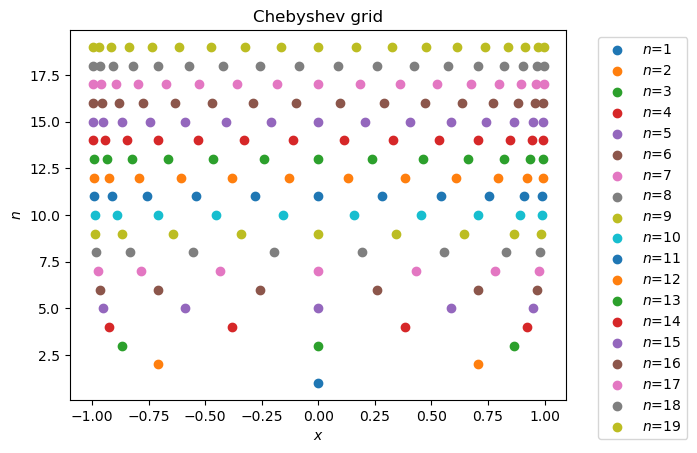

In [24]:
for n in range(1, 20):
    plt.scatter(chebyshev_grid(n), [n for _ in range(n)], label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$n$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Chebyshev grid")
plt.show()

#### See on wikipedia https://en.wikipedia.org/wiki/Chebyshev_nodes

### Lets plot interpolation

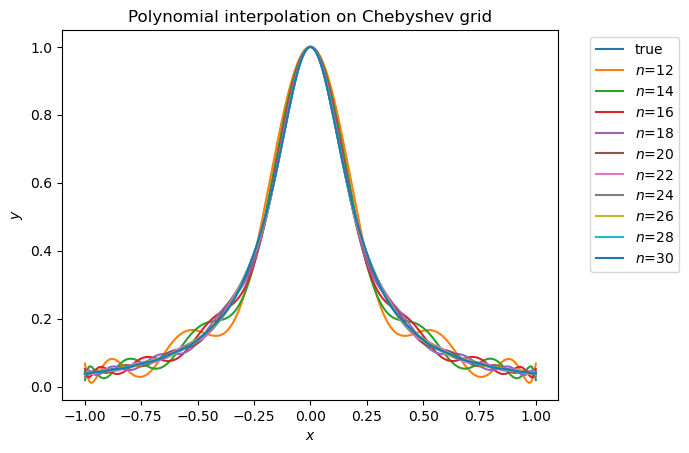

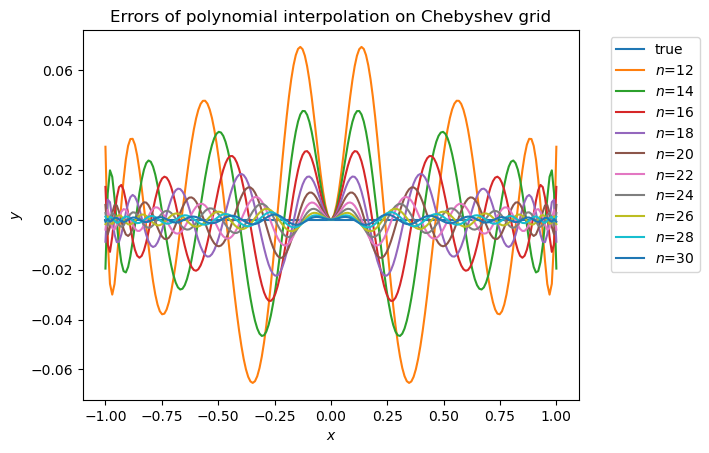

In [28]:
# investigate powers: 2-7, 8-11, 12-31
n_grid = range(12, 31, 2)


# Ground truth
plot_interpolation(f_true, label="true")

# Interpolations
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]

    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_interpolation(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation on Chebyshev grid")
plt.show()


# Errors
plot_error(f_true, label=f"true")
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_error(poly, label=f"$n$={n}")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of polynomial interpolation on Chebyshev grid")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


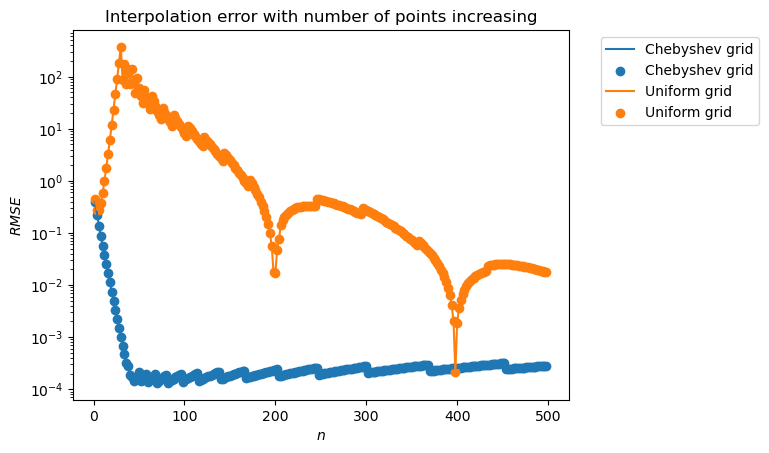

In [34]:
# play with 
n_grid = range(2, 500, 2) 

chebyshev_rmse = []
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    chebyshev_rmse.append(RMSE(poly))

    
uniform_rmse = []
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    uniform_rmse.append(RMSE(poly))




plt.plot(n_grid, chebyshev_rmse, label="Chebyshev grid")
plt.scatter(n_grid, chebyshev_rmse, label="Chebyshev grid")

plt.plot(n_grid, uniform_rmse, label="Uniform grid")
plt.scatter(n_grid, uniform_rmse, label="Uniform grid")
plt.yscale("log")

plt.xlabel("$n$")
plt.ylabel("$RMSE$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Interpolation error with number of points increasing")
plt.show()


#### Q: What happens when $n$ become very large (try 50, 100, 500)?  

In [36]:
0.1 + 0.2 == 0.3

False

In [37]:
0.3

0.3

### Problem 2

The integral of $f(x)$ from the previous problem is $(2 \arctan(5))/5$. Using the interpolants from Problem 1(a), compute the integral of $f(x)$ over the interval $[-1,1]$ for different $h$ and compare with the exact answer

In [ ]:
# Improvisation is here

In [42]:
true_value = 2 * np.arctan(5) / 5
true_value

0.5493603067780064

In [62]:
def int_f_true(n):
    x_grid = uniform_grid(n)
    y_grid = [f_true(x) for x in x_grid]

    delta_x = (x_grid[-1] - x_grid[0]) / n

    int_value = sum(y_grid) * delta_x
    
    return int_value



def int_f_pwc(n):
    x_grid = uniform_grid(n)
    y_grid = [f_pwc(x) for x in x_grid]

    delta_x = (x_grid[-1] - x_grid[0]) / n

    int_value = sum(y_grid) * delta_x
    
    return int_value


def int_f_pwlin(n):
    x_grid = uniform_grid(n)
    y_grid = [f_pwlin(x) for x in x_grid]

    delta_x = (x_grid[-1] - x_grid[0]) / n

    int_value = sum(y_grid) * delta_x
    
    return int_value

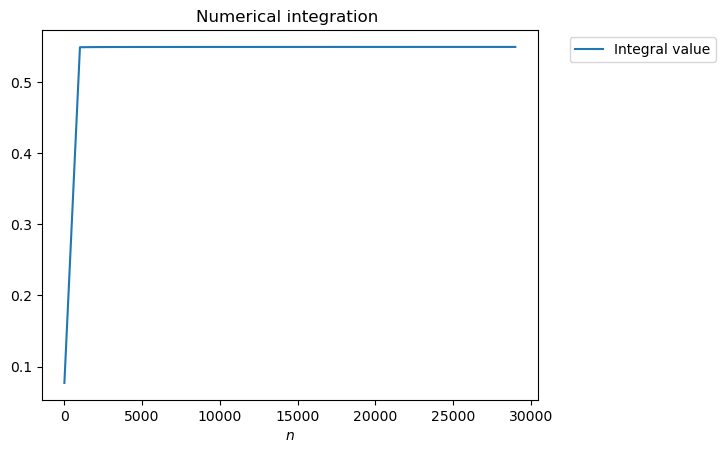

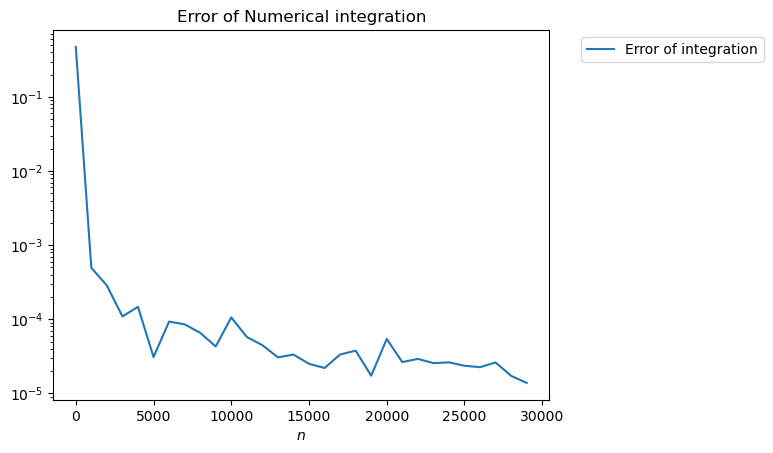

In [63]:
n_grid = range(2, 30000, 1000)
int_by_n = [int_f_pwlin(n) for n in n_grid]
err_by_n = [np.abs((int_f_pwc(n) - true_value))  for n in n_grid]

# Value
plt.plot(n_grid, int_by_n, label="Integral value")
plt.xlabel("$n$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Numerical integration ")
plt.show()


# Error
plt.plot(n_grid, err_by_n, label="Error of integration")
plt.yscale("log")
plt.xlabel("$n$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Error of Numerical integration")
plt.show()
